In [1]:



import numpy as np # linear algebra


In [2]:
import pandas as pd
df = pd.read_csv('datasetsmall.csv')

In [3]:
df.head()

,01/01/2014,01/02/2014,01/03/2014,01/04/2014,01/05/2014,01/06/2014,01/07/2014,01/08/2014,01/09/2014,01/10/2014,...,1/19/2014,1/20/2014,1/21/2014,1/22/2014,1/23/2014,1/24/2014,1/25/2014,1/26/2014,CONS_NO,FLAG
0,2401.0,2500.0,2674.0,2432.00,2231.00,1942.00,2752.00,1244.00,2069.0,2360.0,...,1774.00,2089.0,1300.0,2419.0,2462.0,1177.00,340.00,2272.00,A0E791400CF1C48C43DC26A68227854A,1
1,3318.0,282.0,540.0,5670.00,4854.00,4170.00,4848.00,3546.00,4416.0,3966.0,...,3876.00,3228.0,3054.0,3840.0,1422.0,1956.00,1380.00,96.00,B415F931D3BFB17ACEF48BC648B04FC2,1
2,1020.8,1097.4,1377.4,1408.80,1414.80,1387.40,1444.60,1325.00,1461.6,1253.2,...,1214.60,1285.4,1279.6,1188.6,1362.6,1286.00,1267.60,1444.00,DE8E1EAE4E578C0CEF92D1E23499888F,1
3,0.0,1183.8,1190.4,1183.80,0.00,1154.40,1166.40,1183.80,1169.4,1174.2,...,0.00,1072.8,1090.8,1090.2,1101.0,1079.40,1121.40,1145.40,2952491E940C9040B188B3C9095910D6,0
4,1445.7,1348.2,1281.9,1276.35,1219.95,1289.85,1298.55,1326.15,1410.6,1376.7,...,1331.85,1392.9,1213.2,1463.1,1405.5,1240.05,1190.25,1455.45,DBEED8FD0E7F5E0D1BAF1F86F4983459,1


In [4]:
# Drop the 'CONS_NO' column
df.drop(columns=['CONS_NO'], inplace=True)

# Convert 'FLAG' column to integer type
df['FLAG'] = df['FLAG'].astype(int)

In [5]:
import pandas as pd
from scipy import stats

# Handling missing values
# Interpolate missing values along the columns
df.interpolate(method='linear', axis=1, inplace=True)

In [6]:
import numpy as np
from scipy import stats

# Exclude the 'FLAG' column from outlier detection
data_without_flag = df.drop(columns=['FLAG'])

# Outlier detection and removal using Z-score
# Define a threshold for Z-score (e.g., 3)
z_threshold = 3
z_scores = stats.zscore(data_without_flag)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < z_threshold).all(axis=1)
df = df[filtered_entries]

# Check the shape of the dataframe after outlier removal
print("Shape of dataframe after outlier removal:", df.shape)

Shape of dataframe after outlier removal: (25677, 27)


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

Matplotlib is building the font cache; this may take a moment.


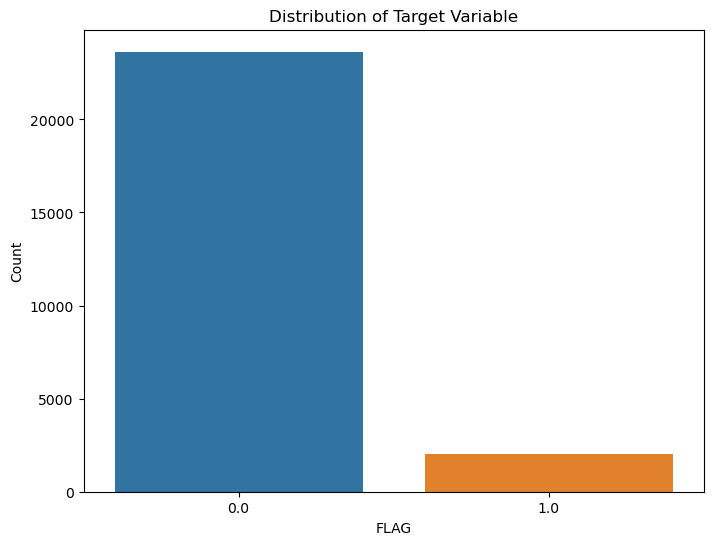

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable ('FLAG')
plt.figure(figsize=(8, 6))
sns.countplot(x='FLAG', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('FLAG')
plt.ylabel('Count')
plt.show()

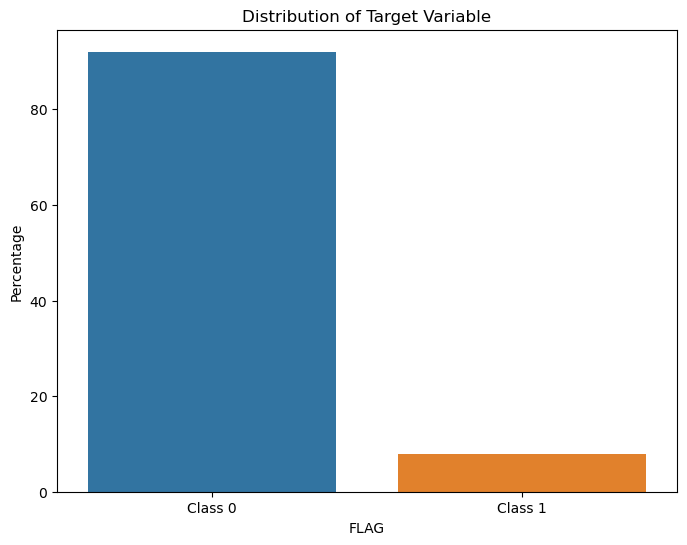

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of each class
class_counts = df['FLAG'].value_counts(normalize=True) * 100

# Plot the distribution of the target variable ('FLAG') as percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Target Variable')
plt.xlabel('FLAG')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])  # Assuming binary classification
plt.show()


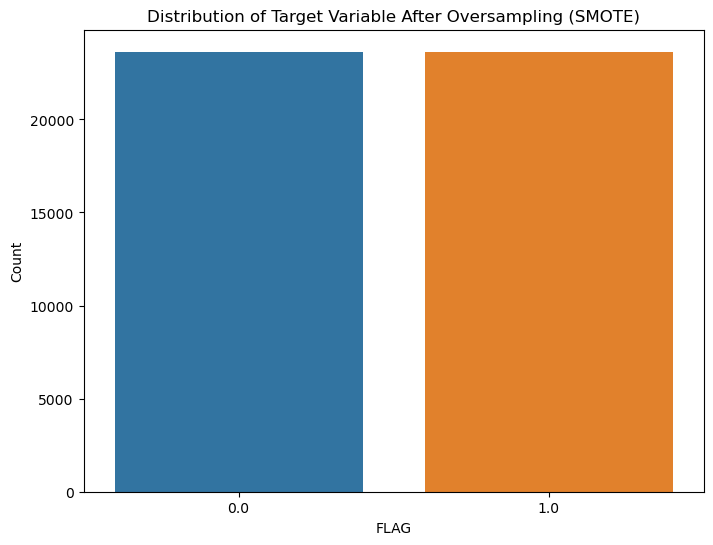

In [10]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features (X) and target variable (y)
X = df.drop(columns=['FLAG'])
y = df['FLAG']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate resampled features and target variable into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='FLAG')], axis=1)

# Visualize the distribution of the target variable after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='FLAG', data=df_resampled)
plt.title('Distribution of Target Variable After Oversampling (SMOTE)')
plt.xlabel('FLAG')
plt.ylabel('Count')
plt.show()



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
         01/01/2014    01/02/2014    01/03/2014    01/04/2014    01/05/2014  \
count  25677.000000  25677.000000  25677.000000  25677.000000  25677.000000   
mean       5.917133      5.749367      5.384465      5.619891      5.941839   
std        8.265382      7.900125      7.532985      7.808352      8.024857   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        3.270000      3.360000      3.060000      3.290000      3.500000   
75%        8.800000      8.450000      7.980000      8.200000      8.750000   
max       99.320000     93.880000     99.690000    126.330000    108.290000   

         01/06/2014    01/07/2014    01/08/2014    01/09/2014    01/10/2014  \
count  25677.000000  25677.000000  25677.000000  25677.000000  25677.000000   
mean       5.601464      5.445547      5.499287      5.570514      5.494675   
std        7.689665      7.6916

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop(columns=['FLAG'])
y = df['FLAG']

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize SVM classifier with rbf kernel
svc = SVC(kernel='rbf')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = svc.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[3035 1657]
 [1556 3206]]


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute classification report
report = classification_report(y_test, y_pred)

# Print classification report
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.65      4692
         1.0       0.66      0.67      0.67      4762

    accuracy                           0.66      9454
   macro avg       0.66      0.66      0.66      9454
weighted avg       0.66      0.66      0.66      9454



In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[3310 1382]
 [ 551 4211]]


In [15]:
# Compute classification report
report = classification_report(y_test, y_pred)

# Print classification report
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.71      0.77      4692
         1.0       0.75      0.88      0.81      4762

    accuracy                           0.80      9454
   macro avg       0.81      0.79      0.79      9454
weighted avg       0.80      0.80      0.79      9454



In [16]:
from sklearn.naive_bayes import GaussianNB
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = gnb.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Compute classification report
report = classification_report(y_test, y_pred)

# Print classification report
print('Classification Report:')
print(report)

Confusion Matrix:
[[4076  616]
 [3599 1163]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.87      0.66      4692
         1.0       0.65      0.24      0.36      4762

    accuracy                           0.55      9454
   macro avg       0.59      0.56      0.51      9454
weighted avg       0.59      0.55      0.51      9454



In [17]:
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy')

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = dtc.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Compute classification report
report = classification_report(y_test, y_pred)

# Print classification report
print('Classification Report:')
print(report)

Confusion Matrix:
[[3848  844]
 [1138 3624]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80      4692
         1.0       0.81      0.76      0.79      4762

    accuracy                           0.79      9454
   macro avg       0.79      0.79      0.79      9454
weighted avg       0.79      0.79      0.79      9454



In [18]:
from sklearn.ensemble import RandomForestClassifier
# Initialize RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = rfc.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Compute classification report
report = classification_report(y_test, y_pred)

# Print classification report
print('Classification Report:')
print(report)

Confusion Matrix:
[[4316  376]
 [ 933 3829]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      4692
         1.0       0.91      0.80      0.85      4762

    accuracy                           0.86      9454
   macro avg       0.87      0.86      0.86      9454
weighted avg       0.87      0.86      0.86      9454



In [20]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost modelini tanımla
xgb = xgb.XGBClassifier()

# Modeli eğit
xgb.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = xgb.predict(X_test)

# Performans metriklerini yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 409.6 kB/s eta 0:04:04
   ---------------------------------------- 0.1/99.8 MB 521.8 kB/s eta 0:03:11
   ---------------------------------------- 0.2/99.8 MB 702.7 kB/s eta 0:02:22
   ---------------------------------------- 0.2/99.8 MB 737.3 kB/s eta 0:02:16
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:33
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.5/99.8 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.6/99.8 MB 1.4 MB/s eta 0:01:11
   --------------

In [21]:
# install the package for lightgbm
!pip install lightgbm


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 131.3 kB/s eta 0:00:11
   - -------------------------------------- 0.0/1.3 MB 245.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.3 MB 326.8 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.3 MB 479.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.3 MB 538.9 kB/s eta 0:00:03
   ------- -------------------------------- 0.2/1.3 MB 718.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 764.6 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 752.2 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.3 MB 764.2 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.3 MB 798.7 kB/s eta 0:00:02
   ---------------- ----------------------- 0.5/1.3 MB 1.0 MB/s eta 0:00:01
   ---

In [22]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1)
#creating the instance of the model265

In [23]:
lgbm.fit(X_train,y_train)
# fitting the model with x_train data y_train 

[LightGBM] [Info] Number of positive: 18873, number of negative: 18943
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 37816, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499074 -> initscore=-0.003702
[LightGBM] [Info] Start training from score -0.003702


LGBMClassifier()

In [24]:
pred = lgbm.predict(X_test)
# predicting the data with model creation /6*

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      4692
         1.0       0.76      0.80      0.78      4762

    accuracy                           0.77      9454
   macro avg       0.77      0.77      0.77      9454
weighted avg       0.77      0.77      0.77      9454



In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
log = LogisticRegression()

In [29]:
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
pred = log.predict(X_test)

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.56      0.73      0.63      4692
         1.0       0.61      0.43      0.50      4762

    accuracy                           0.58      9454
   macro avg       0.58      0.58      0.57      9454
weighted avg       0.58      0.58      0.57      9454



In [32]:
from sklearn.ensemble import AdaBoostClassifier


In [33]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [34]:
pred = ada.predict(X_test)

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.61      0.60      0.61      4692
         1.0       0.61      0.62      0.62      4762

    accuracy                           0.61      9454
   macro avg       0.61      0.61      0.61      9454
weighted avg       0.61      0.61      0.61      9454



In [36]:
# Assuming you have trained your models and stored them in a dictionary named `models`
models = {
    'SVC': svc,
    'KNN': knn,
    'GNB': gnb,
    'DTC': dtc,
    'RFC': rfc,
    "XGB": xgb,
    "LGBM":lgbm,
    "LOG":log,
    "ADA":ada
}

from sklearn.metrics import classification_report

# Dictionary to store classification reports for each model
reports = {}

# Loop over the trained models
for model_name, model in models.items():
    # Predict using the trained model on the test data
    y_pred = model.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Store the classification report
    reports[model_name] = report

# Print classification reports
for model_name, report in reports.items():
    print(f"Classification Report for {model_name}:\n{report}\n")

Classification Report for SVC:
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.65      4692
         1.0       0.66      0.67      0.67      4762

    accuracy                           0.66      9454
   macro avg       0.66      0.66      0.66      9454
weighted avg       0.66      0.66      0.66      9454


Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.86      0.71      0.77      4692
         1.0       0.75      0.88      0.81      4762

    accuracy                           0.80      9454
   macro avg       0.81      0.79      0.79      9454
weighted avg       0.80      0.80      0.79      9454


Classification Report for GNB:
              precision    recall  f1-score   support

         0.0       0.53      0.87      0.66      4692
         1.0       0.65      0.24      0.36      4762

    accuracy                           0.55      9454
   macro avg       0.59      0.56

In [37]:
param_grid = { 
'n_estimators': [25, 50, 100], 
'max_features': ['sqrt', 'log2'], 
'max_depth': [3, 6], 
'max_leaf_nodes': [3, 6] 
} 


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_model = GridSearchCV(RandomForestClassifier(),
                        param_grid=param_grid)

In [40]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6], 'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 6],
                         'n_estimators': [25, 50, 100]})

In [41]:
pred = grid_model.predict(X_test)

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.68      0.49      0.57      4692
         1.0       0.61      0.78      0.68      4762

    accuracy                           0.64      9454
   macro avg       0.65      0.63      0.63      9454
weighted avg       0.65      0.64      0.63      9454



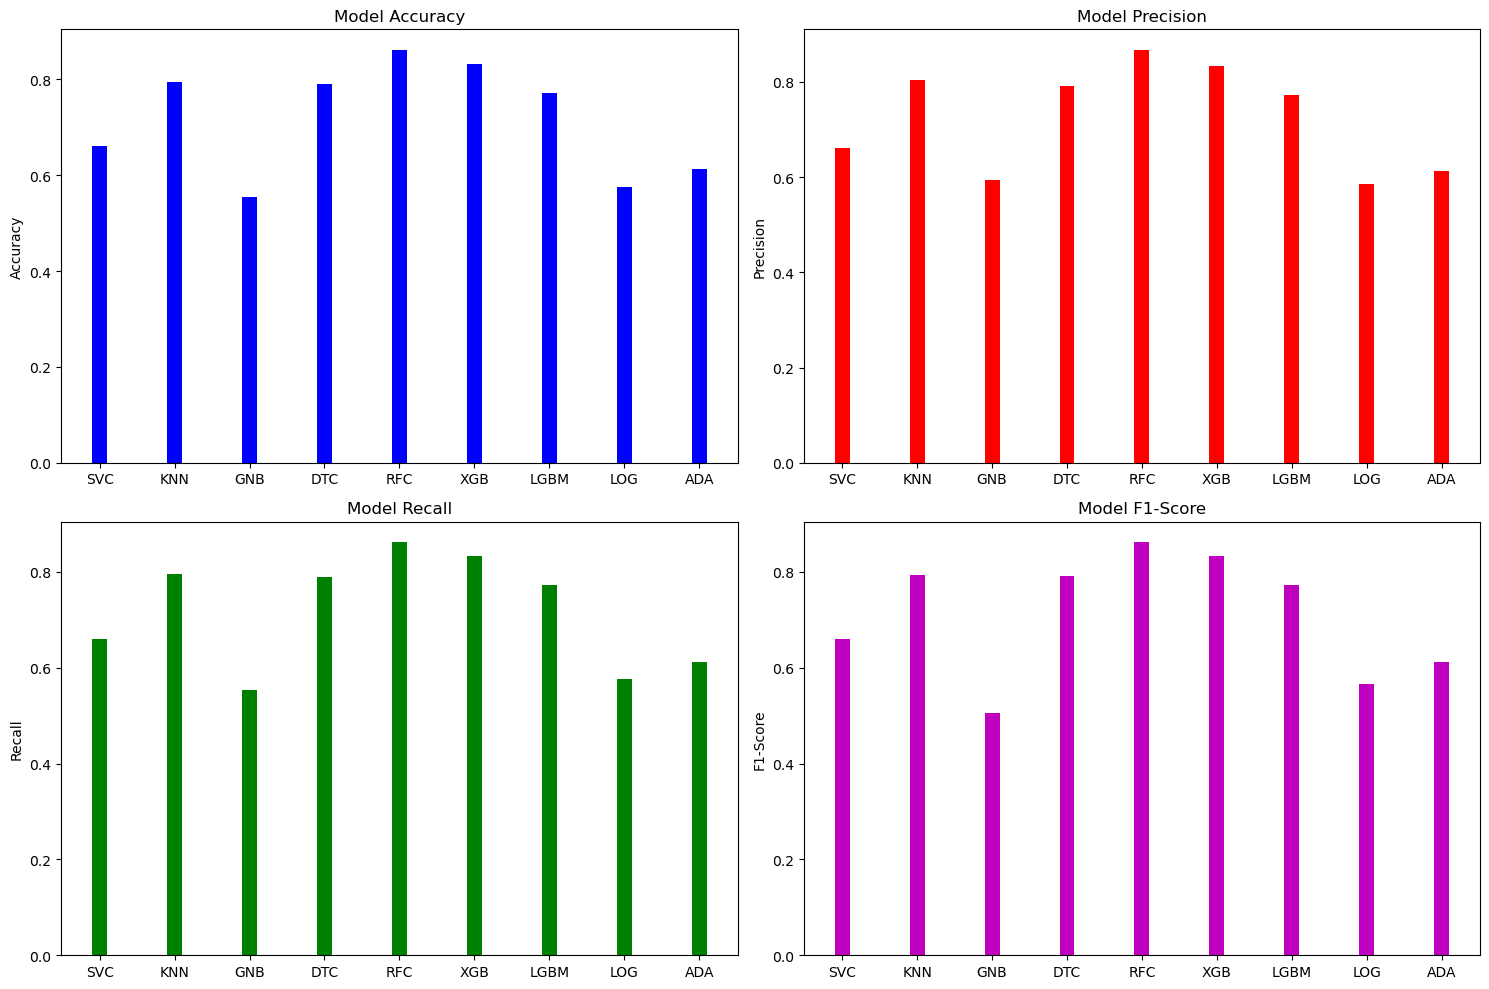

In [43]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Loop over the trained models and extract required metrics
for model_name, model in models.items():
    # Predict using the trained model on the test data
    y_pred = model.predict(X_test)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report, output dictionary format
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # We are taking the weighted average here to consider imbalanced classes
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Store the metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1_score)

# Creating a bar plot for each metric
fig, ax = plt.subplots(2, 2, figsize=(15, 10))  # Creating a subplot for each metric

# Setting the positions and width for the bars
positions = np.arange(len(metrics['Model']))
bar_width = 0.2

# Plotting each metric
ax[0, 0].bar(positions, metrics['Accuracy'], bar_width, label='Accuracy', color='b')
ax[0, 0].set_title('Model Accuracy')
ax[0, 0].set_xticks(positions)
ax[0, 0].set_xticklabels(metrics['Model'])
ax[0, 0].set_ylabel('Accuracy')

ax[0, 1].bar(positions, metrics['Precision'], bar_width, label='Precision', color='r')
ax[0, 1].set_title('Model Precision')
ax[0, 1].set_xticks(positions)
ax[0, 1].set_xticklabels(metrics['Model'])
ax[0, 1].set_ylabel('Precision')

ax[1, 0].bar(positions, metrics['Recall'], bar_width, label='Recall', color='g')
ax[1, 0].set_title('Model Recall')
ax[1, 0].set_xticks(positions)
ax[1, 0].set_xticklabels(metrics['Model'])
ax[1, 0].set_ylabel('Recall')

ax[1, 1].bar(positions, metrics['F1-Score'], bar_width, label='F1-Score', color='m')
ax[1, 1].set_title('Model F1-Score')
ax[1, 1].set_xticks(positions)
ax[1, 1].set_xticklabels(metrics['Model'])
ax[1, 1].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()